In [1]:
try:
  import pydrake
  import underactuated
except ImportError:
  !curl -s https://raw.githubusercontent.com/RussTedrake/underactuated/master/scripts/setup/jupyter_setup.py > jupyter_setup.py
  from jupyter_setup import setup_underactuated
  setup_underactuated()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from pydrake.all import Linearize, LinearQuadraticRegulator

In [4]:
def dynamics(state, control, m, g, l):
    dt = 0.05
    prev_theta = state[0]
    prev_theta_dot = state[1]

    theta_ddot = (control - (m*g*l*np.sin(prev_theta)))/m * l**2

    theta_dot = prev_theta_dot + theta_ddot * dt

    theta = prev_theta + theta_dot*dt

    E = (0.5 * m * l**2 * theta_dot**2) - m*g*l*np.cos(theta) - m*g*l
    
    u = -0.1 * theta_dot * E

    next_state = [theta, theta_dot]
    
    return next_state, u

In [145]:
def lqrDynamics(state, K, A, B):
    dt = 0.05
    prev_theta = state[0]
    prev_theta_dot = state[1]
    
    array_state = np.reshape(state, (2,1))
    
    #print("State: ", array_state.shape)
    x_bar = array_state - np.array([[np.pi], [0]])

    #print("x_bar: ", x_bar.shape)
    u = -np.dot(K, x_bar)
    #print("u: ", u.shape)
    x_dot = np.dot(A, x_bar) + B*u
    #print("x_dot: ", x_dot.shape)
    
    theta_dot = prev_theta_dot + x_dot[1]*dt

    
    theta = prev_theta + theta_dot * dt
    
    new_state = [theta[0], theta_dot[0]]

    return new_state

In [169]:
m = 1.
g = 10.
l = 1.
u = 0.01


initial_state_1 = [-.5, 0.7]
initial_state_2 = [-.3, 0.5]
initial_state_3 = [-.45, 0.45]
initial_state_4 = [-.1, 0.3]
initial_state_5 = [-.5, 1.2]
final_state = [np.pi, 0]

In [170]:
A = np.array([[0, 1], [19.62, -0.4]])
B = np.array([[0], [4]])
Q = np.diag((10., 1.))
R = [1]
(K, S) = LinearQuadraticRegulator(A, B, Q, R)

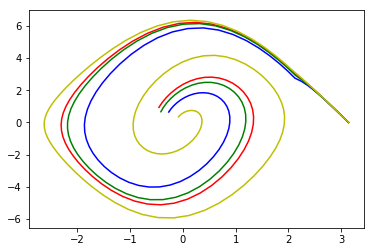

In [171]:
x = 0
u=0

state_1_0 = []
state_1_1 = []
state = initial_state_1

A = np.array([[0, 1], [19.62, -0.4]])
B = np.array([[0], [4]])
Q = np.diag((10., 1.))
R = [1]


while state[0]<2:
    state, u = dynamics(state, u, 1, 10 ,1)
    state_1_0.append(state[0])
    state_1_1.append(state[1])


    
while state[0]<3.14:
    state = lqrDynamics(state,K, A, B)
    
    state_1_0.append(state[0])
    state_1_1.append(state[1])
        

#plt.plot(state_1_0, state_1_1)
#plt.show()

x = 0
u=0

state_2_0 = []
state_2_1 = []
state = initial_state_2

A = np.array([[0, 1], [19.62, -0.4]])
B = np.array([[0], [4]])
Q = np.diag((10., 1.))
R = [1]


while state[0]<2:
    state, u = dynamics(state, u, 1, 10 ,1)
    state_2_0.append(state[0])
    state_2_1.append(state[1])


    
while state[0]<3.14:
    state = lqrDynamics(state,K, A, B)
    
    state_2_0.append(state[0])
    state_2_1.append(state[1])
        

#plt.plot(state_1_0, state_1_1)
#plt.show()

x = 0
u=0

state_3_0 = []
state_3_1 = []
state = initial_state_3

A = np.array([[0, 1], [19.62, -0.4]])
B = np.array([[0], [4]])
Q = np.diag((10., 1.))
R = [1]


while state[0]<2:
    state, u = dynamics(state, u, 1, 10 ,1)
    state_3_0.append(state[0])
    state_3_1.append(state[1])


    
while state[0]<3.14:
    state = lqrDynamics(state,K, A, B)
    
    state_3_0.append(state[0])
    state_3_1.append(state[1])
        

#plt.plot(state_1_0, state_1_1)
#plt.show()

x = 0
u=0

state_4_0 = []
state_4_1 = []
state = initial_state_4

A = np.array([[0, 1], [19.62, -0.4]])
B = np.array([[0], [4]])
Q = np.diag((10., 1.))
R = [1]


while state[0]<2:
    state, u = dynamics(state, u, 1, 10 ,1)
    state_4_0.append(state[0])
    state_4_1.append(state[1])


    
while state[0]<3.14:
    state = lqrDynamics(state,K, A, B)
    
    state_4_0.append(state[0])
    state_4_1.append(state[1])
        

plt.plot(state_1_0, state_1_1, 'r-', state_2_0, state_2_1, 'b-', state_3_0, state_3_1, 'g-',
        state_4_0, state_4_1, 'y-')
plt.show()


